# Statistical Power Assignment

In [19]:
import numpy as np
import pandas as pd
import math
from scipy import stats
from statsmodels.stats.power import TTestIndPower

import matplotlib.pyplot as plt

%matplotlib inline

### Computing Sample Size Required

Suppose we are conducting a test where we have:

- Effect size of 0.5
- Significance level of 0.05
- Looking to achieve 80% statistical power

How large of a sample size would we need for this experiment?

In [ ]:
#using the power test to calculate the missing piss in the equation basically.
import math
analysis = TTestIndPower()

result = analysis.solve_power(effect_size=0.5, nobs1=None, alpha=0.05, power=0.8, ratio=1.0)
2 * math.ceil(result)

128

### Computing Effect Size Required

Suppose we are conducting a test where we have:

- Sample size of 100
- Significance level of 0.05
- Looking to achieve 80% statistical power

How large of an effect size would we need to see for this experiment?

In [ ]:
effectsize = analysis.solve_power(effect_size=None, nobs1=100, alpha=0.05, power=0.8, ratio=1.0)
effectsize

0.39813911739112756

Generate a power plot that shows how the statistical power of this test would change based on the number of observations and varying effect sizes.

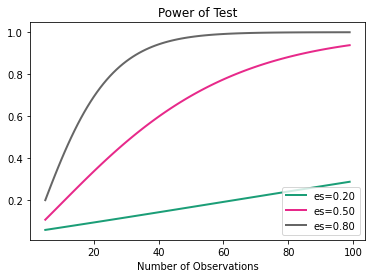

In [ ]:
effect_sizes= np.array([0.2, 0.5, 0.8])
sample_size= np.array(range(5,100))
#callucalting power plote
analysis.plot_power(dep_var='nobs', nobs=sample_size, effect_size=effect_sizes)
plt.show()

### Computing Statistical Power

Suppose we are conducting a test where we have:

- Effect size of 0.4
- Sample size of 100
- Significance level of 0.05

What would be the statistical power for this experiment?

In [ ]:
Stat_power = analysis.solve_power(effect_size=0.4, nobs1=100, alpha=0.05, power=None, ratio=1.0)
Stat_power

0.8036474965430769

Generate a plot that examines how the statistical power of this experiment would change based on different significance levels.

## Computing Statistical Power for a Real Data Set

Yesterday afternoon, you conducted a t-test on the titanic data set to determine whether there was a significant difference between the average age of passengers who survived and those who did not survive. In this section, compute the statistical power of that test.

### Import the data, and drop rows where `'Age'` is NA.

In [ ]:
data_url = 'https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/titanic.csv'

In [2]:
compute = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/titanic.csv')
compute

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Summarize the number of observations and average age per group.

In [ ]:
compute.shape

(891, 12)

In [ ]:
average= compute.groupby('Age').sum()
average

,PassengerId,Survived,Pclass,SibSp,Parch,Fare
Age,,,,,,
0.42,804,1,3,0,1,8.5167
0.67,756,1,2,1,1,14.5000
0.75,1115,2,6,4,2,38.5166
0.83,911,2,4,1,3,47.7500
0.92,306,1,1,1,2,151.5500
...,...,...,...,...,...,...
70.00,1419,0,3,1,1,81.5000
70.50,117,0,3,0,0,7.7500
71.00,591,0,2,0,0,84.1584


### Perform t-test.

In [ ]:
# this t-test
stats.ttest_ind(compute['Age'], compute['Fare'])

Ttest_indResult(statistic=nan, pvalue=nan)

### Calculate the Effect Size

Effect size can be calculated by using a formula known as Cohen's d, which divides the difference in means between the two groups by their pooled standard deviation.

`effect_size = (mean_of_sample1 - mean_of_sample2) / pooled_stdev`

The pooled standard deviation in the denominator can be derived as follows.

`pooled_stdev = sqrt(((n_obs1 - 1) * var1 + (n_obs2 - 1) * var2) / (n_obs1 + n_obs2 - 2))`

Where `n_obs` is the number of observations and `var` is the variance of each sample.

**Write the code below to calculate the effect size for this test.**

In [6]:

alive = compute[compute['Survived'] == 1]
dead = compute[compute['Survived'] == 0]

In [11]:
total_alive = alive['Age'].mean()
total_dead = dead['Age'].mean()
number_obs1 = alive['Age'].count()
number_obs2 = dead['Age'].count()
variance1 = alive['Age'].var()
variance2 = dead['Age'].var()

pooled_stdev = math.sqrt(((number_obs1 - 1) * variance1 + (number_obs2 - 1) * variance2) / (number_obs1 + number_obs2 - 2))
effect_sizes = (total_dead - total_alive) / pooled_stdev

print(effect_sizes)

0.15748597191363298


**Use the effect size you calculated to compute the statistical power of this test.**

In [14]:

analysis = TTestIndPower()
result = analysis.solve_power(effect_size=effect_sizes, nobs1=number_obs1+number_obs2, alpha=0.05, power=None, ratio=1.0)
print(round(result * 100), "%")

84.0 %


**Determine the effect size we would need to see to get a statistical power of 0.8.**

In [15]:

result = analysis.solve_power(effect_size=None, nobs1=number_obs1+number_obs2, alpha=0.05, power=0.8, ratio=1.0)
round(result,1)

0.1

**Determine the sample size necessary to get a statistical power of 0.8.**

In [16]:
sample = analysis.solve_power(effect_size=result, nobs1=None, alpha=0.05, power=0.8, ratio=1.0)
2 * math.ceil(sample)


1430

**Generate a visualization that shows the significance level we would need to get a statistical power of 0.8.**

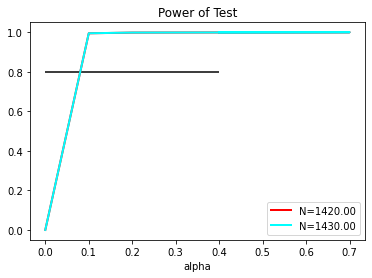

In [22]:
nobsy = np.array([1420, 1430])
_sizes = np.array([0.1, 0.2, 0.7, 0.5, 0.9])
significance_levels = np.array([0.0, 0.1, 0.2, 0.7, 0.4])

analysis = TTestIndPower()
analysis.plot_power(dep_var='alpha', nobs=nobsy, alpha=significance_levels, effect_size=effect_sizes)
plt.hlines(0.8, 0, 0.4)
plt.show()